# Implementation of PCA

- Implement PCA
- Use PCA to iris dataset
- Introduce PCA by scikit-learn

## Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Let's implement PCA !
HOW TO DO IT?
1. Calculate covariance matrix（共分散行列を求める）
1. Solve the eigenvalue problem（固有値問題を解く）
1. Sort the eigenvalues and eigenvectors in descending order of the eigenvalues（固有値の大きい順に固有値と固有ベクトルをソートする）
1. Reduce dimensionality（次元削減する）

### 1.1. Calculate covariance matrix
Input : 
- Input data : $\boldsymbol{X}=(\boldsymbol{x_1},\boldsymbol{x_2},\cdots,\boldsymbol{x_N})^\top\in\mathbb{R}^{N\times K}$ ( $N$ : number of data, $K$ : dimension of each data )

Output :
1. Average deviation matrix (平均偏差行列) : $\boldsymbol{\tilde{X}}=\boldsymbol{X} - \boldsymbol{I_N}\boldsymbol{\overline{x}}^\top\in\mathbb{R}^{N\times K}
\quad\left(\boldsymbol{\overline{x}} = \frac{1}{N}\sum_n\boldsymbol{x_n}= \frac{1}{N}\boldsymbol{X}^\top \boldsymbol{I_N}\right)$
1. Convariance matrix (共分散行列) : $\boldsymbol{M} = \frac{1}{N}\boldsymbol{\tilde{X}}^\top \boldsymbol{\tilde{X}}\in\mathbb{R}^{K\times K}$

<details>
    <summary>Hints</summary>
    <div>
        <br>
        - np.mean(X, axis=None) :  Calculates average of vector or matrix. axis along which the means are computed. The default is to compute the mean of the flattened array. (axisで指定した方向に平均をとる．デフォルトでは全ての要素の平均値．)
        <br>
        - np.dot(X, Y) : Calculates matrix product (行列積) $\boldsymbol{X}\times\boldsymbol{Y}$
        <br>
        - X.shape : Returns the shape of input array. ex. $\boldsymbol{\tilde{X}}.shape = np.array([N, K])$
        <br>
        - X.T or X.transpose() : Returns transposed X.
        <br>
    </div>
</details>

In [2]:
def calc_converiance_matrix(X):
    ### TODO ###
    X_bar = X - np.mean(X, axis=0) 
    M = np.dot(X_bar.T, X_bar) / X.shape[0]
    ### TODO ###
    return X_bar, M

### Test
Please continue to debug until no error occurs.

In [3]:
# test 1
X = np.arange(16).reshape(4, 4)
X_bar, M = calc_converiance_matrix(X)
assert (X_bar == np.array([[-6, -2, 2, 6]]* 4).transpose()).all()
assert (M == np.cov(X, rowvar=False, bias=1)).all()

# test 2
X = np.array([[1, 3], [4, 2], [3, 5]])
X_bar, M = calc_converiance_matrix(X)
assert np.sum(X_bar - np.array([[-5./3, -1./3], [4./3, -4./3], [1./3, 4./3]])**2) < 1e-8
assert np.sum((M - np.cov(X, rowvar=False, bias=1))**2) < 1e-8

### 1.2. Solve the eigenvalue problem（固有値問題を解く）
Input : 
- Convariance matrix (共分散行列) : $\boldsymbol{M} \in\mathbb{R}^{K\times K}$

Output : 
1. Eigenvalues ( $K$個の固有値 ) : $\boldsymbol{w}\in\mathbb{R}^{K}$
1. Eigenvectors ( $K$個の固有値ベクトル ) : $\boldsymbol{V}\in\mathbb{R}^{K\times K}$
     - First axis represents NUMBER of DATA. 
     - Second axis represents DIMENSION of VECTOR.

<details>  
    <summary>Hints</summary>
    <div>
        - np.linalg.eig(X) : Returns eigenvalues (固有値) and eigenvectors (固有ベクトル).
        <br>
        - eigenvalues : $\boldsymbol{w}\in\mathbb{R}^{K}$  ( $K$ represents number of data.)
        <br>
        - eigenvectors : $\boldsymbol{V}\in\mathbb{R}^{K\times K}$ ( First axis represents DIMENSION of VECTOR, second axis represents NUMBER of DATA. )
        <br>
        - X.T or X.transpose() : Returns transposed X.
    </div>
</details>

In [4]:
def solve_eigen_prob(M):
    ### TODO ###
    w, V = np.linalg.eig(M)
    V = V.T
    ### TODO ###
    return w, V

### 1.3. Sort the eigenvectors in descending order of the eigenvalues（固有ベクトルを固有値の降順に並べかえる）
Input :
1. Eigenvalues ( $K$個の固有値 ) : $\boldsymbol{w}\in\mathbb{R}^{K}$
1. Eigenvectors ( $K$個の固有値ベクトル ) : $\boldsymbol{V}\in\mathbb{R}^{K\times K}$

Output : 
- Eigenvectors ( $K$個の固有値ベクトル ) : $\boldsymbol{V}\in\mathbb{R}^{K\times K}$ sorted in descending order of $\boldsymbol{w}$

<details>
    <summary>Hint</summary>
    <div><br>
    - x.argsort() : Returns the indices that would sort an array in ascending order (昇順).
    <br>
    - x[::-1] : Returns reversed x.
    </div>
</details>

In [5]:
def sort_matrix(w, V):
    ### TODO ###
    idx = w.argsort()[::-1]
    V = V[idx]
    ### TODO ### 
    return V

### Test
Please continue to debug until no error occurs.

In [6]:
# test 1
w = np.arange(4)
V = np.arange(16).reshape(4, 4)
V_sorted = sort_matrix(w, V)
assert (V_sorted == np.flip(np.arange(16).reshape(4, 4), axis=0)).all()

# test 2
w = np.array([3,1,4,2])
V = np.arange(16).reshape(4, 4)
V_sorted = sort_matrix(w, V)
assert (V_sorted == np.array([[8, 9, 10, 11],[0, 1, 2, 3],[12, 13, 14, 15],[4, 5, 6, 7]])).all()

### 1.4. Reduce dimensionality
Input : 
1. Eigenvectors ( $K$個の固有値ベクトル ) : $\boldsymbol{V}\in\mathbb{R}^{K\times K}$ sorted by descending order of $\boldsymbol{w}$
1. Dimension of output (次元削減後の次元数) : $r\in\mathbb{R}^{1}$
1. Average deviation matrix (平均偏差行列) : $\boldsymbol{\tilde{X}}\in\mathbb{R}^{N\times K}$

Output : 
- Output data reduced dimension : $\boldsymbol{X\_pca}\in\mathbb{R}^{N\times r}$ 

<details>
    <summary>Hints</summary>
    <div>
    <br>
    1. Fetch $r$-vectors from $\boldsymbol{V}$ from the beginning : $\boldsymbol{C}\in\mathbb{R}^{r\times K}$
    <br>
    2. Caltulate $\boldsymbol{X\_pca}$ by calculate $\boldsymbol{\tilde{X}} \times \boldsymbol{C}^\top$
    </div>
</details>

In [7]:
def reduce_dimension(V_sorted, r, X_bar):
    ### TODO ### 
    C = V_sorted[:r]
    X_pca = np.dot(X_bar, C.T)
    ### TODO ###
    return X_pca

### 1.5. Create PCA function by merging above functions
Input : 
1. Input data : $\boldsymbol{X}=(\boldsymbol{x_1},\boldsymbol{x_2},\cdots,\boldsymbol{x_N})^\top\in\mathbb{R}^{N\times K}$ ( $N$ : number of data, $K$ : dimension of each data )
1.  Dimension of output (次元削減後の次元数) : $r\in\mathbb{R}^{1}$

Output : 
- Output data reduced dimension : $\boldsymbol{X\_pca}\in\mathbb{R}^{N\times r}$ 

In [8]:
def calc_PCA(X, r):
    
    # 1. Calculate covariance matrix
    X_bar, M = calc_converiance_matrix(X)

    # 2. Solve the eigenvalue problem
    w, V = solve_eigen_prob(M)

    # 3. Sort the eigenvalues and eigenvectors in descending order of the eigenvalues
    V_sorted = sort_matrix(w, V)

    # 4. Reduce dimensionality
    X_pca = reduce_dimension(V_sorted, r, X_bar)
    
    return X_pca

##  2. Try on iris dataset

### 2.1. Load dataset

In [9]:
from sklearn import datasets
dataset = datasets.load_iris()

features = dataset.data
targets = dataset.target

print ('Shape of features : ', features.shape)
print ('Shape of targets : ', targets.shape)

Shape of features :  (150, 4)
Shape of targets :  (150,)


### 2.2. Use PCA function to reduce dimension

In [10]:
transformed = calc_PCA(features, 2)

### 2.3. Show the result

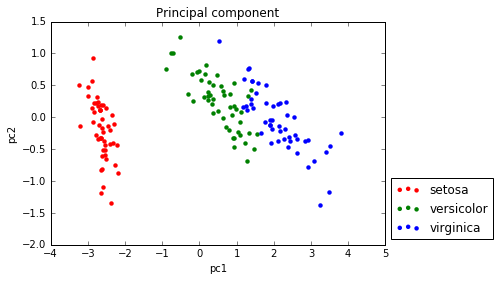

In [11]:
for label, c in zip(np.unique(targets), ['r', 'g', 'b']):
    plt.scatter(transformed[targets == label, 0], transformed[targets == label, 1], c=c, linewidths=0)
plt.title('Principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(dataset.target_names, loc='lower left', bbox_to_anchor=(1, 0))
plt.show()

## 3. Introduce PCA by scikit-learn

### 3.1. Import PCA module

In [12]:
from sklearn.decomposition import PCA

### 3.2 Transform features

In [13]:
pca = PCA(n_components=2)
pca.fit(features)
transformed_sklearn = pca.transform(features)

### 3.3 Show the result

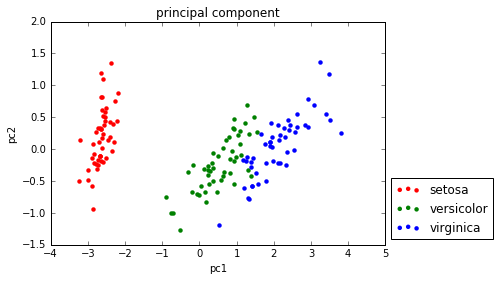

In [14]:
for label, c in zip(np.unique(targets), ['r', 'g', 'b']):
    plt.scatter(transformed_sklearn[targets == label, 0], transformed_sklearn[targets == label, 1], c=c, linewidths=0)
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(dataset.target_names, loc='lower left', bbox_to_anchor=(1, 0))
plt.show()